In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#load data
def load_data(base_path):
    user_register_log_df = pd.read_csv(base_path+'/user_register_log.txt',sep='\t',header=None,names=['user_id','register_day','register_type','device_type'])
    app_launch_log_df = pd.read_csv(base_path+'/app_launch_log.txt',sep='\t',header=None,names=['user_id','day'])
    video_create_log_df = pd.read_csv(base_path+'/video_create_log.txt',sep='\t',header=None,names=['user_id','day'])
    user_activity_log_df = pd.read_csv(base_path+'/user_activity_log.txt',sep='\t',header=None,names = ['user_id','day','page','video_id','author_id','action_type'])
    return user_register_log_df,app_launch_log_df,video_create_log_df,user_activity_log_df
#获取label
def get_label(current_day):
    app_temp_df=app_launch_log_df[(app_launch_log_df.day<current_day+7) & (app_launch_log_df.day>=current_day)][['user_id']].drop_duplicates()
    video_temp_df=video_create_log_df[(video_create_log_df.day<current_day+7) & (video_create_log_df.day>=current_day)][['user_id']].drop_duplicates()
    action_temp_df=user_activity_log_df[(user_activity_log_df.day<current_day+7) & (user_activity_log_df.day>=current_day)][['user_id']].drop_duplicates()
    active=pd.concat([app_temp_df,video_temp_df,action_temp_df],axis=0).drop_duplicates()
    active['label']=1
    return active

#注册特征
def get_register_feature(current_day):
    register=user_register_log_df[user_register_log_df.register_day<current_day].copy()
    register['register_day_diff']=register.register_day.apply(lambda x: current_day-x)
    return register

In [10]:
#加载数据
user_register_log_df,app_launch_log_df,video_create_log_df,user_activity_log_df=load_data('/Users/zhaosw/Desktop/kuaishou/data')

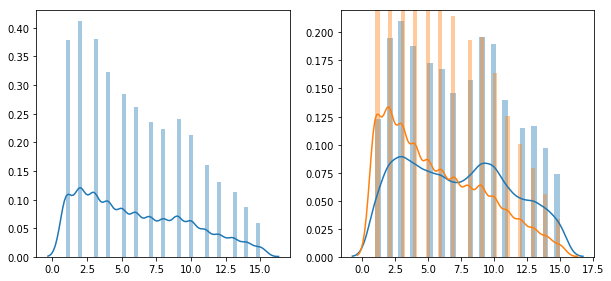

In [13]:
# data1
# feature 1-15 label 16-22
register=get_register_feature(16)[['user_id']]
label=get_label(16)
app_launch_log_temp_df=app_launch_log_df[(app_launch_log_df.day<16) & (app_launch_log_df.day>=1)]
temp=app_launch_log_temp_df[['user_id','day']].drop_duplicates()
temp.day=16-temp.day
temp=pd.merge(register,temp,on=['user_id'],how='left').fillna(-1)
temp=pd.merge(temp,label,on=['user_id'],how='left')
temp.label=temp.label.apply(lambda x: 1 if x==1 else 0)
plt.figure(1,figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(temp[['day']])
plt.subplot(2,2,2)
sns.distplot(temp[temp.label==0][['day']])
sns.distplot(temp[temp.label==1][['day']])
plt.show()

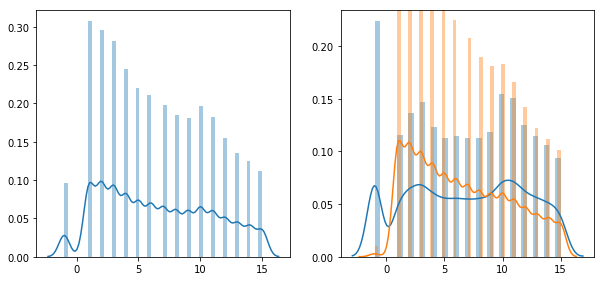

In [12]:
# data2
# feature 9-23 label 24-30
register=get_register_feature(24)[['user_id']]
label=get_label(24)
app_launch_log_temp_df=app_launch_log_df[(app_launch_log_df.day<24) & (app_launch_log_df.day>=9)]
temp2=app_launch_log_temp_df[['user_id','day']].drop_duplicates()
temp2.day=24-temp2.day
temp2=pd.merge(register,temp2,on=['user_id'],how='left').fillna(-1)
temp2=pd.merge(temp2,label,on=['user_id'],how='left')
temp2.label=temp2.label.apply(lambda x: 1 if x==1 else 0) 
plt.figure(1,figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(temp2[['day']])
plt.subplot(2,2,2)
sns.distplot(temp2[temp2.label==0][['day']])
sns.distplot(temp2[temp2.label==1][['day']])
plt.show()

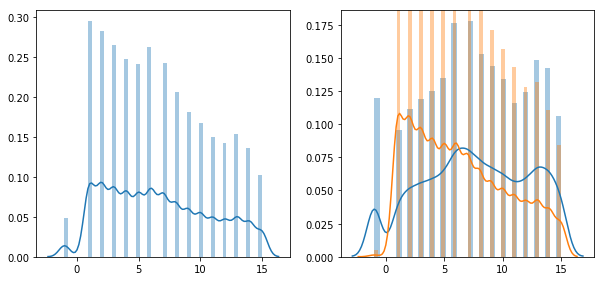

In [14]:
#另外补充了一个feature 5-22 label 20-26的数据集
register=get_register_feature(20)[['user_id']]
label=get_label(20)
app_launch_log_temp_df=app_launch_log_df[(app_launch_log_df.day<20) & (app_launch_log_df.day>=5)]
temp3=app_launch_log_temp_df[['user_id','day']].drop_duplicates()
temp3.day=20-temp3.day
temp3=pd.merge(register,temp3,on=['user_id'],how='left').fillna(-1)
temp3=pd.merge(temp3,label,on=['user_id'],how='left')
temp3.label=temp3.label.apply(lambda x: 1 if x==1 else 0) 
plt.figure(1,figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(temp3[['day']])
plt.subplot(2,2,2)
sns.distplot(temp3[temp3.label==0][['day']])
sns.distplot(temp3[temp3.label==1][['day']])
plt.show()

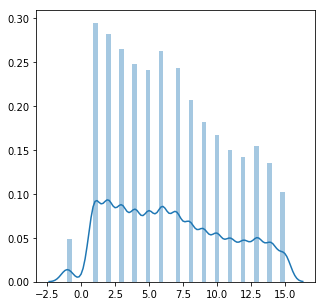

In [18]:
# data3 测试集
# feature 16-30 
register=get_register_feature(31)[['user_id']]
app_launch_log_temp_df=app_launch_log_df[(app_launch_log_df.day<31) & (app_launch_log_df.day>=16)]
temp4=app_launch_log_temp_df[['user_id','day']].drop_duplicates()
temp4.day=31-temp4.day
temp4=pd.merge(register,temp4,on=['user_id'],how='left').fillna(-1)
plt.figure(1,figsize=(5,5))
sns.distplot(temp3[['day']])
plt.show()

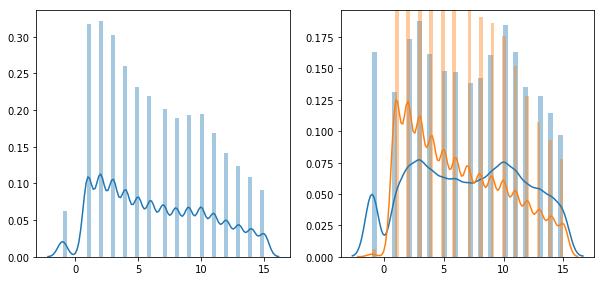

In [16]:
#data1 data2合并
temp5=pd.concat([temp,temp2],axis=0)
plt.figure(1,figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(temp5[['day']])
plt.subplot(2,2,2)
sns.distplot(temp5[temp5.label==0][['day']])
sns.distplot(temp5[temp5.label==1][['day']])
plt.show()

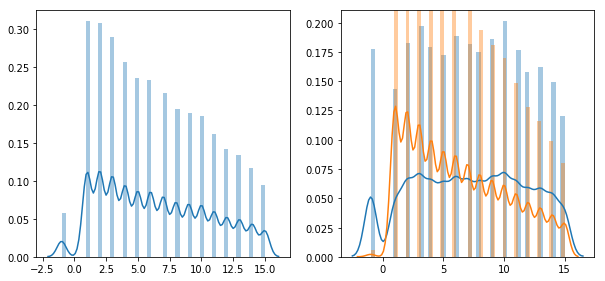

In [19]:
#data1 data2,补充的数据集 合并
temp6=pd.concat([temp,temp2,temp3],axis=0)
plt.figure(1,figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(temp6[['day']])
plt.subplot(2,2,2)
sns.distplot(temp6[temp6.label==0][['day']])
sns.distplot(temp6[temp6.label==1][['day']])
plt.show()

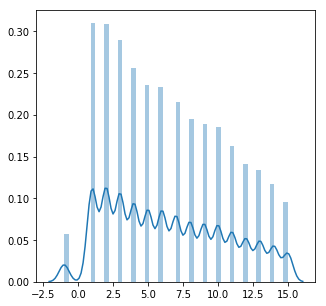

In [21]:
#data1 data2,data3 合并
temp7=pd.concat([temp,temp2,temp3],axis=0)
plt.figure(1,figsize=(5,5))
sns.distplot(temp7[['day']])
plt.show()